# Perceptron

In [4]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
iris=load_iris(as_frame=True)
X=iris.data[['petal length (cm)','petal width (cm)']].values
y=(iris.target==0)
per_clf=Perceptron(random_state=42)
per_clf.fit(X,y)
X_new=[[2,0.5],[3,1]]
y_pred=per_clf.predict(X_new)
y_pred

array([ True, False])

# Sequential API

Building an Image Classifier using sequential API

In [5]:
import tensorflow as tf

In [6]:
fashion_mnist=tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 2s 0us/step


In [12]:
len(fashion_mnist)

2

In [35]:
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist
X_train,y_train=X_train_full[:-5000],y_train_full[:-5000]
X_val,y_val=X_train_full[-5000:],y_train_full[-5000:]

In [36]:
#keras load this dataset as 28*28 array rather then 1D array of size 784
#pixel intensity are represented as integers (from 0 to 255) rather then floats(from 0.0 to 255.0)
X_train.shape

(55000, 28, 28)

In [37]:
X_val.shape

(5000, 28, 28)

In [38]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [39]:
#scalling pixel intensity down to range(0-1) by dividing them 255.0
X_train,X_val,X_test=X_train/255.,X_val/255.,X_test/255.

In [40]:
class_names=['Tshirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankel Boot']

In [41]:
class_names[y_train[0]]

'Ankel Boot'

In [42]:
tf.random.set_seed(42)
model=tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300,activation='relu'))#hidden layer 1- 300 neurons
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [55]:
X_train.shape
y_train.shape

(55000,)

In [45]:
model.layers

In [46]:
#get_weights and set_weights
hidden1=model.layers[1]
weights,biases=hidden1.get_weights()
weights.shape

(784, 300)

In [47]:
biases.shape

(300,)

In [48]:
#compile the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [49]:
history=model.fit(X_train,y_train,epochs=30,validation_data=(X_val,y_val))
#default batch size=32, 55000/32=1719 batches per epochs

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7113 - accuracy: 0.7623 - val_loss: 0.5064 - val_accuracy: 0.8290
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4860 - accuracy: 0.8317 - val_loss: 0.4608 - val_accuracy: 0.8328
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4387 - accuracy: 0.8461 - val_loss: 0.4174 - val_accuracy: 0.8534
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4129 - accuracy: 0.8553 - val_loss: 0.3922 - val_accuracy: 0.8604
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3915 - accuracy: 0.8622 - val_loss: 0.3877 - val_accuracy: 0.8602
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3748 - accuracy: 0.8679 - val_loss: 0.3876 - val_accuracy: 0.8624
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3620 - accuracy: 0.8716 - val_loss: 0.3672 - val_accuracy:

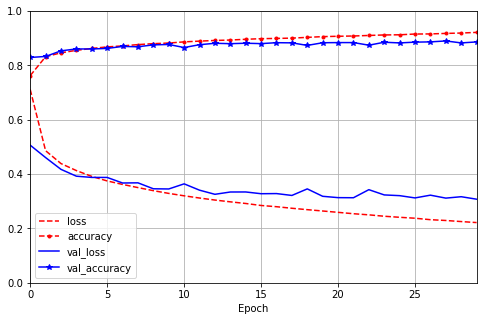

In [50]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(
    figsize=(8,5),xlim=[0,29],ylim=[0,1],grid=True,xlabel='Epoch',
    style=["r--","r--.","b-","b-*"]
)
plt.show()

In [51]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3269 - accuracy: 0.8858


[0.32689350843429565, 0.8858000040054321]

In [52]:
#using the model to make predictions
X_new=X_test[:3]
y_proba=model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 190ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [53]:
import numpy as np
y_pred=y_proba.argmax(axis=1)
y_pred

array([9, 2, 1], dtype=int64)

In [54]:
np.array(class_names)[y_pred]

array(['Ankel Boot', 'Pullover', 'Trouser'], dtype='<U10')

# MLP Using the Sequential API

In [56]:
tf.random.set_seed(42)
norm_layer=tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model=tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(1)
])
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse',optimizer=optimizer,metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history=model.fit(X_train,y_train,epochs=20,validation_data=(X_val,y_val))
mse_test,rmse_test=model.evaluate(X_test,y_test)
print(mse_test)
print(rmse_test)
X_new=X_test[:3]
y_pred=model.predict(X_new)
y_pred


Epoch 1/20
1719/1719 [==============================] - 7s 3ms/step - loss: 8.6023 - root_mean_squared_error: 2.9330 - val_loss: 8.4174 - val_root_mean_squared_error: 2.9014
Epoch 2/20
1719/1719 [==============================] - 6s 3ms/step - loss: 8.3041 - root_mean_squared_error: 2.8817 - val_loss: 8.3922 - val_root_mean_squared_error: 2.8971
Epoch 3/20
1719/1719 [==============================] - 6s 3ms/step - loss: 8.2880 - root_mean_squared_error: 2.8789 - val_loss: 8.3967 - val_root_mean_squared_error: 2.8979
Epoch 4/20
1719/1719 [==============================] - 6s 3ms/step - loss: 8.2825 - root_mean_squared_error: 2.8779 - val_loss: 8.4708 - val_root_mean_squared_error: 2.9106
Epoch 5/20
1719/1719 [==============================] - 6s 4ms/step - loss: 8.2762 - root_mean_squared_error: 2.8769 - val_loss: 8.3932 - val_root_mean_squared_error: 2.8973
Epoch 6/20
1719/1719 [==============================] - 6s 4ms/step - loss: 8.2660 - root_mean_squared_error: 2.8751 - val_loss: 8

array([[[4.5152597],
        [4.5152597],
        [4.5152597],
        [4.5152597],
        [4.5152597],
        [4.5152597],
        [4.5152597],
        [4.519934 ],
        [4.527933 ],
        [4.52651  ],
        [4.5668945],
        [4.56307  ],
        [4.570861 ],
        [4.578683 ],
        [4.584017 ],
        [4.571027 ],
        [4.566194 ],
        [4.558568 ],
        [4.563426 ],
        [4.600623 ],
        [4.5921655],
        [4.5550456],
        [4.5152597],
        [4.5152597],
        [4.5152597],
        [4.5152597],
        [4.5152597],
        [4.5152597]],

       [[4.499804 ],
        [4.389    ],
        [4.3992167],
        [4.4118624],
        [4.426511 ],
        [4.484551 ],
        [4.446469 ],
        [4.4825735],
        [4.494585 ],
        [4.4714346],
        [4.4356728],
        [4.4661355],
        [4.4664145],
        [4.4664145],
        [4.4664145],
        [4.4664145],
        [4.4664145],
        [4.4655957],
        [4.4640126],
        [4.

In [58]:
print(mse_test)
print(rmse_test)

8.247941017150879
2.871917963027954
